<a href="https://colab.research.google.com/github/rishabkolan/Projects/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UFC Fight Duration Prediction**

# 1. Data Preprocessing

In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Creating the dataframe

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Classroom/large_dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df.head(5)

event_name          r_fighter        b_fighter  \
0  UFC Fight Night: Ribas vs. Namajunas       Amanda Ribas   Rose Namajunas   
1  UFC Fight Night: Ribas vs. Namajunas      Karl Williams      Justin Tafa   
2  UFC Fight Night: Ribas vs. Namajunas   Edmen Shahbazyan        AJ Dobson   
3  UFC Fight Night: Ribas vs. Namajunas     Payton Talbott  Cameron Saaiman   
4  UFC Fight Night: Ribas vs. Namajunas  Billy Quarantillo    Youssef Zalal   

  winner       weight_class  is_title_bout gender                method  \
0   Blue  Women's Flyweight              0  Women  Decision - Unanimous   
1    Red        Heavyweight              0    Men  Decision - Unanimous   
2    Red       Middleweight              0    Men                KO/TKO   
3    Red       Bantamweight              0    Men                KO/TKO   
4   Blue      Featherweight              0    Men            Submission   

   finish_round  total_rounds  ...  weight_diff reach_diff  SLpM_total_diff  \
0             5           5.0  ...         0.00       2.54             0.94   
1             3           3.0  ...       -13.16      12.70            -1.22   
2             1           3.0  ...         0.00      -2.54            -0.69   
3             2           3.0  ...         0.00       7.62             2.73   
4             2           3.0  ...         0.00      -5.08             4.48   

   SApM_total_diff  sig_str_acc_total_diff  td_acc_total_diff  \
0            -0.11                   -0.01               0.04   
1            -3.32                   -0.02               0.50   
2            -1.22                    0.06              -0.37   
3            -0.60                    0.08              -0.28   
4             3.84                    0.07              -0.11   

   str_def_total_diff  td_def_total_diff  sub_avg_diff  td_avg_diff  
0               -0.02               0.26           0.2         0.69  
1                0.13               0.50           0.2         4.75  
2               -0.01              -0.02           0.3         0.57  
3                0.00               0.43          -0.2        -0.91  
4               -0.22               0.01          -0.2        -1.04  

[5 rows x 95 columns]

In [4]:
df.columns

Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_

In [5]:
#Found null values after running the reverse order of df
df = df.dropna()

In [6]:
df[['finish_round', 'total_rounds', 'time_sec']]

finish_round  total_rounds  time_sec
0                5           5.0       300
1                3           3.0       300
2                1           3.0       273
3                2           3.0        21
4                2           3.0       110
...            ...           ...       ...
7184             3           3.0       300
7207             5           5.0       300
7250             1           1.0       720
7263             1           1.0        44
7295             1           1.0       496

[6361 rows x 3 columns]

In [7]:
#Finding the target values
df['target'] = (df['finish_round'] -1)*300 + df['time_sec']

In [8]:
# Preparing df to be in order to prepare the train, valid, and test datasets
df = df.iloc[::-1]

In [9]:
df = df.reset_index()
df = df.drop(columns = ['index'], axis = 1)


#2. Feature Engineering

In [10]:
old_df = df[:]

In [11]:
#Found out the career stats of each fighter is constant in all their fights which isn't true. Also found out other key stats were missing.

old_df[old_df['r_fighter'] == 'Charles Oliveira'][['r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg']]




r_SLpM_total  r_SApM_total  r_sig_str_acc_total  r_td_acc_total  \
1733          3.54          3.19                 0.53             0.4   
2470          3.54          3.19                 0.53             0.4   
3298          3.54          3.19                 0.53             0.4   
3660          3.54          3.19                 0.53             0.4   
3818          3.54          3.19                 0.53             0.4   
3987          3.54          3.19                 0.53             0.4   
4260          3.54          3.19                 0.53             0.4   
4922          3.54          3.19                 0.53             0.4   
5217          3.54          3.19                 0.53             0.4   
5414          3.54          3.19                 0.53             0.4   
5651          3.54          3.19                 0.53             0.4   
5960          3.54          3.19                 0.53             0.4   

      r_str_def_total  r_td_def_total  r_sub_avg  r_td_avg  
1733             0.51            0.55        2.7      2.32  
2470             0.51            0.55        2.7      2.32  
3298             0.51            0.55        2.7      2.32  
3660             0.51            0.55        2.7      2.32  
3818             0.51            0.55        2.7      2.32  
3987             0.51            0.55        2.7      2.32  
4260             0.51            0.55        2.7      2.32  
4922             0.51            0.55        2.7      2.32  
5217             0.51            0.55        2.7      2.32  
5414             0.51            0.55        2.7      2.32  
5651             0.51            0.55        2.7      2.32  
5960             0.51            0.55        2.7      2.32

In [12]:
#Creating new variables and replacing the names of the columns to standardize the naming format

df['r_ctrl_sec_total'] = df['r_ctrl_sec'][:]
df['b_ctrl_sec_total'] = df['b_ctrl_sec'][:]
df['r_kd_total'] = df['r_kd'][:]
df['b_kd_total'] = df['b_kd'][:]
df['r_sig_str_ab'] = df['b_sig_str'][:]
df['b_sig_str_ab'] = df['r_sig_str'][:]
df['r_sub_att_total'] = df['r_sub_att'][:]
df['b_sub_att_total'] = df['b_sub_att'][:]
df['r_td_att_total'] = df['r_td_att'][:]
df['b_td_att_total'] = df['b_td_att'][:]
df['r_str_def'] = df['b_sig_str_att'] - df['b_sig_str']
df['b_str_def'] = df['r_sig_str_att'] - df['r_sig_str']
df['r_td_def'] = df['b_td_att'] - df['b_td']
df['b_td_def'] = df['r_td_att'] - df['r_td']
dct = {'r_SLpM_total': 'r_sig_str_total','b_SLpM_total': 'b_sig_str_total','r_SApM_total': 'r_sig_ab_total','b_SApM_total': 'b_sig_ab_total','r_td_avg': 'r_td_total','b_td_avg': 'b_td_total'}
df[[val for val in dct.values()]] = df[[key for key in dct.keys()]]
df = df.drop(columns = [key for key in dct.keys()])

In [13]:
#Creating 2d lists with the 2 variables in each list, the first variable is used to calculate the value of the second variable

red_features = [['r_kd', 'r_kd_total'], ['r_sig_str', 'r_sig_str_total'], ['r_sig_str_ab', 'r_sig_str_ab_total'], ['r_td_att', 'r_td_att_total'], ['r_sub_att', 'r_sub_att_total'], ['r_ctrl_sec', 'r_ctrl_sec_total'], ['r_sig_str_acc', 'r_sig_str_acc_total'], ['r_td_acc', 'r_td_acc_total'], ['r_td_def', 'r_td_def_total'], ['r_str_def', 'r_str_def_total']]
blue_features = [['b_kd', 'b_kd_total'], ['b_sig_str', 'b_sig_str_total'], ['b_sig_str_ab', 'b_sig_str_ab_total'], ['b_td_att', 'b_td_att_total'], ['b_sub_att', 'b_sub_att_total'], ['b_ctrl_sec', 'b_ctrl_sec_total'], ['b_sig_str_acc', 'b_sig_str_acc_total'], ['b_td_acc', 'b_td_acc_total'], ['b_td_def', 'b_td_def_total'], ['b_str_def', 'b_str_def_total']]

In [14]:
#Method to re-evaluate the stats accurate to each fighter

def accurate_stats(dataframe, r_features, b_features, fighters):

  assert len(r_features) == len(b_features)

  for fighter in fighters:
    fighter_red, fighter_blue = dataframe[dataframe['r_fighter'] == fighter], dataframe[dataframe['b_fighter'] == fighter]
    indices = pd.concat([fighter_red, fighter_blue]).sort_index().index
    feature_length = len(r_features)

    for n in np.arange(feature_length):
        count = 0
        average = 0
        sum = 0
        for index in indices:
          count += 1
          if dataframe['r_fighter'].loc[index] == fighter:

            try:
              average = sum / (count - 1)
            except ZeroDivisionError:
              average = 0
            sum += dataframe.loc[index, r_features[n][0]]
            if count == 1:
              dataframe.loc[index, r_features[n][1]] = dataframe.loc[index, r_features[n][0]]
            else:
              dataframe.loc[index, r_features[n][1]] = average
          else:

            try:
              average = sum / (count - 1)
            except ZeroDivisionError:
              average = 0
            sum += dataframe.loc[index, b_features[n][0]]
            if count == 1:
              dataframe.loc[index, b_features[n][1]] = dataframe.loc[index, b_features[n][0]]
            else:
              dataframe.loc[index, b_features[n][1]] = average

  return dataframe






In [15]:
def first_fight(dataframe, r_features, b_features, fighters):
  assert len(r_features) == len(b_features)

  for fighter in fighters:
    fighter_df = dataframe[(dataframe['r_fighter'] == fighter) | (dataframe['b_fighter'] == fighter)].sort_index()
    indices = fighter_df.index[1:]
    main_index = fighter_df.index[0]
    feature_length = len(r_features)

    if fighter_df.shape[0]>1:

      for n in np.arange(feature_length):
        sum = 0
        for index in indices:
          if dataframe.loc[index, 'r_fighter'] == fighter:
            sum += dataframe.loc[index, r_features[n]]
          else:
            sum += dataframe.loc[index, b_features[n]]

        if dataframe.loc[main_index, 'r_fighter'] == fighter:
          dataframe.loc[main_index, r_features[n]] = sum/fighter_df.shape[0]
        else:
          dataframe.loc[main_index, b_features[n]] = sum/fighter_df.shape[0]
    else:
      continue


  return dataframe





In [16]:
df['r_avg_fight_time'] = df['target'][:]
df['b_avg_fight_time'] = df['target'][:]



In [17]:
fighters_array = np.unique(np.concatenate([np.unique(df['r_fighter']), np.unique(df['b_fighter'])]))
len(fighters_array)

1812

In [18]:
#Fixing the data

df = accurate_stats(df, red_features, blue_features, fighters_array)
df = first_fight(df, [feature[1] for feature in red_features], [feature[1] for feature in blue_features], fighters_array)

/tmp/ipython-input-666399315.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, r_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.33333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3333333333333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarn

In [19]:
#Creating the differnce metrics

red_totals = [feature[1] for feature in red_features]
blue_totals = [feature[1] for feature in blue_features]
final_features = [feature.strip('r_').replace('total', 'diff') for feature in red_totals]

for n in np.arange(len(final_features)):
  df[final_features[n]] = np.abs(df[red_totals[n]] - df[blue_totals[n]])

In [20]:
#Creating X and y dataframes for three round and five round fights

df['reach_diff'] = np.abs(df['reach_diff'])

x_features = ['r_fighter', 'b_fighter', 'reach_diff', 'total_rounds'] + red_totals + blue_totals + final_features + ['target']


X= df[x_features]


three_rnd_X, five_rnd_X = X[X['total_rounds'] == 3.0].drop(['total_rounds'], axis = 1), X[X['total_rounds'] == 5.0].drop(['total_rounds'], axis = 1)





In [21]:
three_rnd_fighters_array = np.unique(np.concatenate([np.unique(three_rnd_X['r_fighter']), np.unique(three_rnd_X['b_fighter'])]))

three_rnd_X = accurate_stats(three_rnd_X, [['target', 'r_avg_fight_time']], [['target', 'b_avg_fight_time']], three_rnd_fighters_array)
three_rnd_X = first_fight(three_rnd_X, ['r_avg_fight_time'], ['b_avg_fight_time'], three_rnd_fighters_array).drop(columns = ['r_fighter', 'b_fighter'])


three_rnd_X[['r_avg_fight_time', 'b_avg_fight_time']]

r_avg_fight_time  b_avg_fight_time
4           623.329894        450.000000
5           331.419643        270.452381
6           255.655556        344.683333
9           683.400000        686.492857
11          789.486111        685.961281
...                ...               ...
6355        500.500000        165.000000
6356        694.666667        900.000000
6357        658.000000        710.750000
6358        501.888889        900.000000
6359        900.000000        330.000000

[5733 rows x 2 columns]

In [22]:
three_rnd_X['b_avg_fight_time'].max()

900.0

In [23]:

three_rnd_X.isnull().sum().sum()

np.int64(0)

## 3. LightGBM

In [24]:
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
!pip install lightgbm

In [26]:
import lightgbm as lgb

In [27]:
#starting with three_rnd_X

X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)

In [28]:
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)

In [29]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 284.723	valid_1's rmse: 310.153
[200]	training's rmse: 266.149	valid_1's rmse: 307.408
[300]	training's rmse: 251.915	valid_1's rmse: 306.958
[400]	training's rmse: 239.524	valid_1's rmse: 306.961
[500]	training's rmse: 228.28	valid_1's rmse: 307.273
[600]	training's rmse: 217.974	valid_1's rmse: 307.699
[700]	training's rmse: 208.148	valid_1's rmse: 308.203
[800]	training's rmse: 198.987	valid_1's rmse: 308.458
[900]	training's rmse: 190.603	valid_1's rmse: 308.768
[1000]	training's rmse: 182.436	valid_1's rmse: 309.203
Did not meet early stopping. Best iteration is:
[312]	training's rmse: 250.272	valid_1's rmse: 306.749


In [30]:
y_train = train_set.get_label()   # 1-D numpy array
y_valid = test_set.get_label()
baseline_rmse = np.sqrt(((y_valid - y_train.mean())**2).mean())
print("Baseline RMSE:", baseline_rmse)
print("y std (train):", np.std(y_train))

Baseline RMSE: 327.09744
y std (train): 320.3461


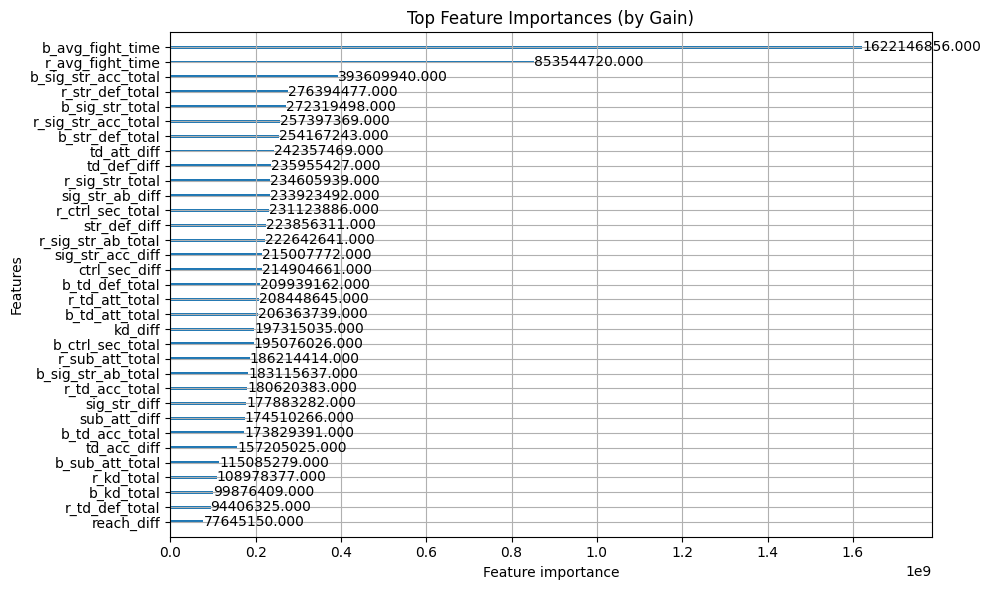

In [31]:
lgb.plot_importance(lgb_model, max_num_features=35, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [32]:
three_rnd_X = three_rnd_X.join(df[['r_fighter', 'b_fighter', 'method']])
three_rnd_X['total_avg_time'] = (three_rnd_X['r_avg_fight_time'] + three_rnd_X['b_avg_fight_time'])/2
three_rnd_X['finish'] = [0 if 'decision' in str(m).lower() else 1 for m in three_rnd_X['method']]
three_rnd_X['r_finish_rate'] = three_rnd_X['finish']
three_rnd_X['b_finish_rate'] = three_rnd_X['finish']

In [33]:


three_rnd_X = accurate_stats(three_rnd_X, [['finish', 'r_finish_rate']], [['finish', 'b_finish_rate']], three_rnd_fighters_array)
three_rnd_X = first_fight(three_rnd_X, ['r_finish_rate'], ['b_finish_rate'], three_rnd_fighters_array).drop(columns = ['r_fighter', 'b_fighter', 'finish', 'method'])

/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, r_features[n][1]] = average


In [34]:
three_rnd_X.columns

Index(['reach_diff', 'r_kd_total', 'r_sig_str_total', 'r_sig_str_ab_total',
       'r_td_att_total', 'r_sub_att_total', 'r_ctrl_sec_total',
       'r_sig_str_acc_total', 'r_td_acc_total', 'r_td_def_total',
       'r_str_def_total', 'b_kd_total', 'b_sig_str_total',
       'b_sig_str_ab_total', 'b_td_att_total', 'b_sub_att_total',
       'b_ctrl_sec_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_td_def_total', 'b_str_def_total', 'kd_diff', 'sig_str_diff',
       'sig_str_ab_diff', 'td_att_diff', 'sub_att_diff', 'ctrl_sec_diff',
       'sig_str_acc_diff', 'td_acc_diff', 'td_def_diff', 'str_def_diff',
       'target', 'b_avg_fight_time', 'r_avg_fight_time', 'total_avg_time',
       'r_finish_rate', 'b_finish_rate'],
      dtype='object')

In [35]:
X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 278.34	valid_1's rmse: 302.464
[200]	training's rmse: 258.563	valid_1's rmse: 298.361
[300]	training's rmse: 243.868	valid_1's rmse: 296.791
[400]	training's rmse: 231.369	valid_1's rmse: 297.112
[500]	training's rmse: 219.991	valid_1's rmse: 297.339
[600]	training's rmse: 209.649	valid_1's rmse: 297.705
[700]	training's rmse: 199.937	valid_1's rmse: 297.545
[800]	training's rmse: 190.777	valid_1's rmse: 297.636
[900]	training's rmse: 182.641	valid_1's rmse: 298.178
[1000]	training's rmse: 174.566	valid_1's rmse: 298.294
Did not meet early stopping. Best iteration is:
[307]	training's rmse: 242.911	valid_1's rmse: 296.676


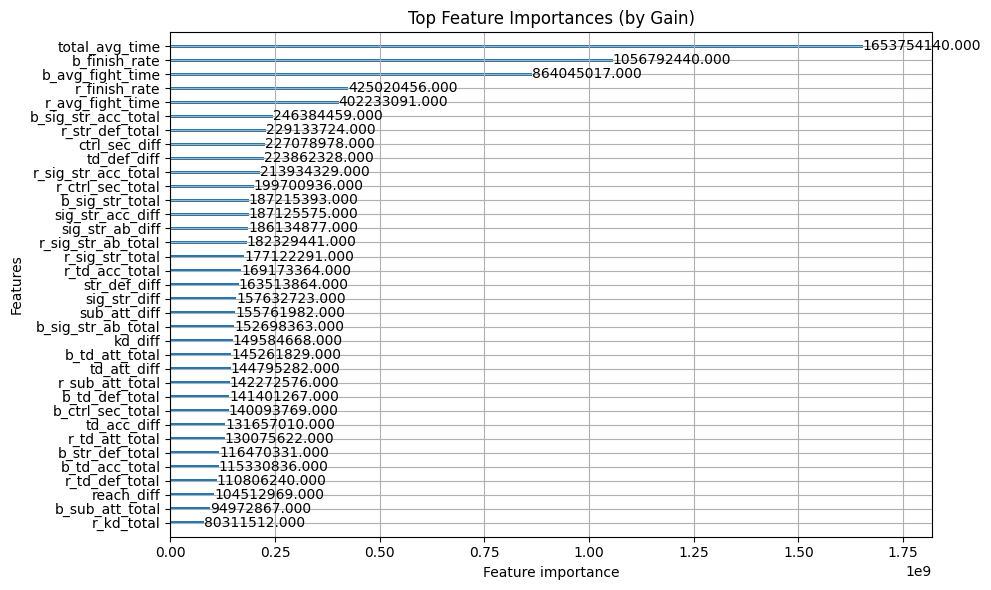

In [36]:
#features related to time and finishes are key for model improvement, could average out the stats between red and blue and remove their individual stats

lgb.plot_importance(lgb_model, max_num_features=35, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [37]:
red_totals = red_totals + ['r_finish_rate']
blue_totals = blue_totals + ['b_finish_rate']

In [38]:
average_stats = [feature.replace('_total', '_average').strip('r_') for feature in red_totals]
average_stats[-1] = average_stats[-1] + '_average'
average_stats

['kd_average',
 'sig_str_average',
 'sig_str_ab_average',
 'td_att_average',
 'sub_att_average',
 'ctrl_sec_average',
 'sig_str_acc_average',
 'td_acc_average',
 'td_def_average',
 'str_def_average',
 'finish_rate_average']

In [39]:
def averages(three_rnd_X, red_totals, blue_totals, average_stats):
  for n in np.arange(len(average_stats)):
    three_rnd_X[average_stats[n]] = (three_rnd_X[red_totals[n]] + three_rnd_X[blue_totals[n]])/2


  return three_rnd_X

In [40]:
three_rnd_X = averages(three_rnd_X, red_totals, blue_totals, average_stats)

In [41]:
X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 277.758	valid_1's rmse: 302.117
[200]	training's rmse: 257.349	valid_1's rmse: 297.526
[300]	training's rmse: 242.065	valid_1's rmse: 296.436
[400]	training's rmse: 229.056	valid_1's rmse: 296.585
[500]	training's rmse: 217.381	valid_1's rmse: 297.038
[600]	training's rmse: 206.579	valid_1's rmse: 297.653
[700]	training's rmse: 196.454	valid_1's rmse: 297.626
[800]	training's rmse: 187.146	valid_1's rmse: 297.913
[900]	training's rmse: 178.466	valid_1's rmse: 298.395
[1000]	training's rmse: 170.064	valid_1's rmse: 298.648
Did not meet early stopping. Best iteration is:
[329]	training's rmse: 238.224	valid_1's rmse: 296.307


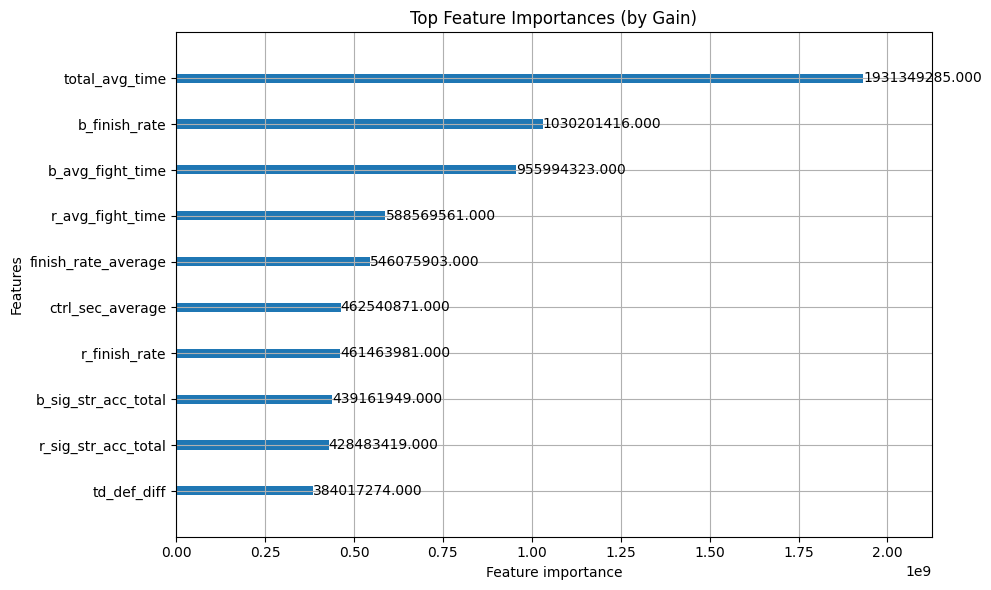

In [52]:
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

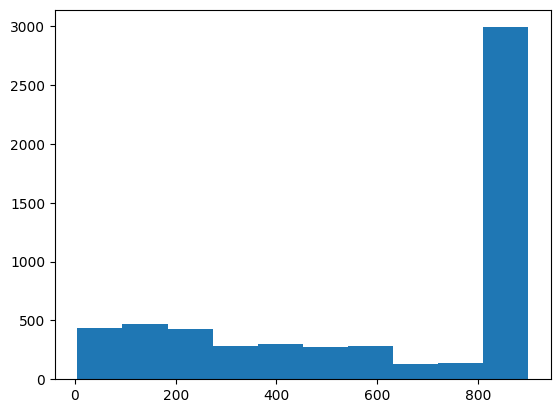

In [43]:
#skewed distribution might be impacting model performance

plt.hist(three_rnd_X['target'])
plt.show()

In [70]:
important_features = [
    "total_avg_time",
    "b_finish_rate",
    "b_avg_fight_time",
    "finish_rate_average",
    "r_finish_rate",
    "r_avg_fight_time",
    'target'

]

In [59]:
X_train, X_test = train_test_split(three_rnd_X[important_features], test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 281.922	valid_1's rmse: 300.495
[200]	training's rmse: 267.19	valid_1's rmse: 296.259
[300]	training's rmse: 256.971	valid_1's rmse: 295.433
[400]	training's rmse: 248.714	valid_1's rmse: 295.705
[500]	training's rmse: 241.287	valid_1's rmse: 296.447
[600]	training's rmse: 234.545	valid_1's rmse: 297.231
[700]	training's rmse: 227.984	valid_1's rmse: 298.152
[800]	training's rmse: 222.028	valid_1's rmse: 298.43
[900]	training's rmse: 216.315	valid_1's rmse: 298.919
[1000]	training's rmse: 210.846	valid_1's rmse: 299.486
Did not meet early stopping. Best iteration is:
[262]	training's rmse: 260.55	valid_1's rmse: 295.232


In [60]:
df.groupby(['is_title_bout', 'method']).count()

event_name  r_fighter  b_fighter  \
is_title_bout method                                                      
0             DQ                               18         18         18   
              Decision - Majority              48         48         48   
              Decision - Split                608        608        608   
              Decision - Unanimous           2279       2279       2279   
              KO/TKO                         1885       1885       1885   
              Submission                     1116       1116       1116   
              TKO - Doctor's Stoppage          59         59         59   
1             DQ                                1          1          1   
              Decision - Majority               3          3          3   
              Decision - Split                 24         24         24   
              Decision - Unanimous            116        116        116   
              KO/TKO                          131        131        131   
              Submission                       67         67         67   
              TKO - Doctor's Stoppage           6          6          6   

                                       winner  weight_class  gender  \
is_title_bout method                                                  
0             DQ                           18            18      18   
              Decision - Majority          48            48      48   
              Decision - Split            608           608     608   
              Decision - Unanimous       2279          2279    2279   
              KO/TKO                     1885          1885    1885   
              Submission                 1116          1116    1116   
              TKO - Doctor's Stoppage      59            59      59   
1             DQ                            1             1       1   
              Decision - Majority           3             3       3   
              Decision - Split             24            24      24   
              Decision - Unanimous        116           116     116   
              KO/TKO                      131           131     131   
              Submission                   67            67      67   
              TKO - Doctor's Stoppage       6             6       6   

                                       finish_round  total_rounds  time_sec  \
is_title_bout method                                                          
0             DQ                                 18            18        18   
              Decision - Majority                48            48        48   
              Decision - Split                  608           608       608   
              Decision - Unanimous             2279          2279      2279   
              KO/TKO                           1885          1885      1885   
              Submission                       1116          1116      1116   
              TKO - Doctor's Stoppage            59            59        59   
1             DQ                                  1             1         1   
              Decision - Majority                 3             3         3   
              Decision - Split                   24            24        24   
              Decision - Unanimous              116           116       116   
              KO/TKO                            131           131       131   
              Submission                         67            67        67   
              TKO - Doctor's Stoppage             6             6         6   

                                       referee  ...  b_sig_ab_total  \
is_title_bout method                            ...                   
0             DQ                            18  ...              18   
              Decision - Majority           48  ...              48   
              Decision - Split             608  ...             608   
              Decision - Unanimous        2279  ...            2279   
          

In [62]:
three_rnd_X = three_rnd_X.join(df['is_title_bout'])

In [64]:
important_features.append('is_title_bout')

In [71]:
X_train, X_test = train_test_split(three_rnd_X[important_features], test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 284.076	valid_1's rmse: 299.655
[200]	training's rmse: 272.331	valid_1's rmse: 295.733
[300]	training's rmse: 265.23	valid_1's rmse: 295.372
[400]	training's rmse: 259.548	valid_1's rmse: 295.713
[500]	training's rmse: 254.768	valid_1's rmse: 296.426
[600]	training's rmse: 250.422	valid_1's rmse: 297.123
[700]	training's rmse: 246.312	valid_1's rmse: 297.895
[800]	training's rmse: 242.6	valid_1's rmse: 298.356
[900]	training's rmse: 239.074	valid_1's rmse: 298.992
[1000]	training's rmse: 235.907	valid_1's rmse: 299.847
Did not meet early stopping. Best iteration is:
[251]	training's rmse: 268.304	valid_1's rmse: 295.234


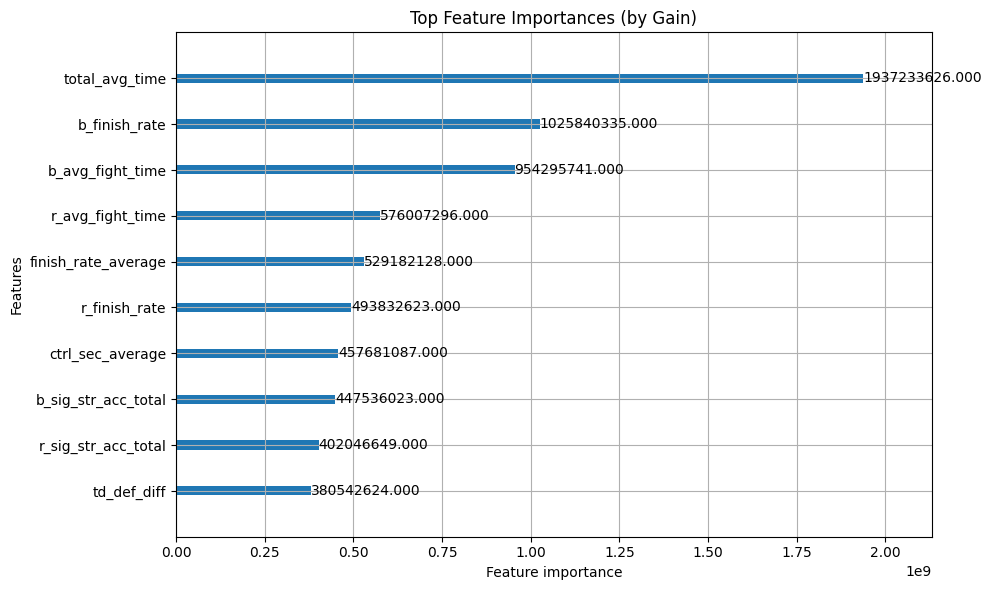

In [68]:

lgb.plot_importance(lgb_model, max_num_features= 20, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [69]:
importance_df = pd.DataFrame({
    'feature': lgb_model.feature_name(),
    'importance': lgb_model.feature_importance(importance_type='gain')
})

print(importance_df.sort_values('importance', ascending=False))

                feature    importance
0        total_avg_time  1.937234e+09
1         b_finish_rate  1.025840e+09
2      b_avg_fight_time  9.542957e+08
5      r_avg_fight_time  5.760073e+08
3   finish_rate_average  5.291821e+08
4         r_finish_rate  4.938326e+08
6      ctrl_sec_average  4.576811e+08
8   b_sig_str_acc_total  4.475360e+08
9   r_sig_str_acc_total  4.020466e+08
7           td_def_diff  3.805426e+08
10        is_title_bout  0.000000e+00


Further feature engineering wont improve the model by a lot as there has only been an improvement of 20 seconds from what I think were the most impactful features. This also means that fine tuning will probably not help the model much as the features aren't good enough to produce a good model. Regardless, I was able to learn about the importance of feature engineering and data cleaning in contructing a machine learning model.